In [1]:
import serial
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM5'

 


In [3]:
X = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_x_no_stratified.pcl", 'rb'))
y = np.array(pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_pcl/all_y_no_stratified.pcl", 'rb')))

1000


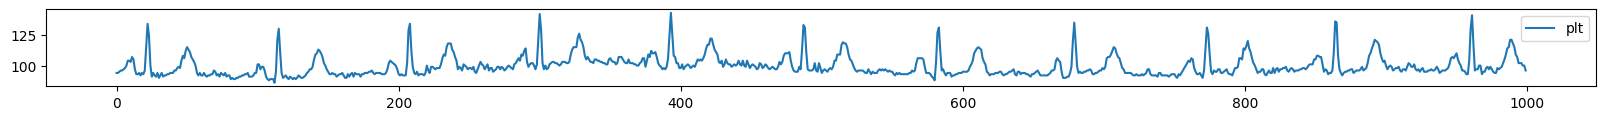

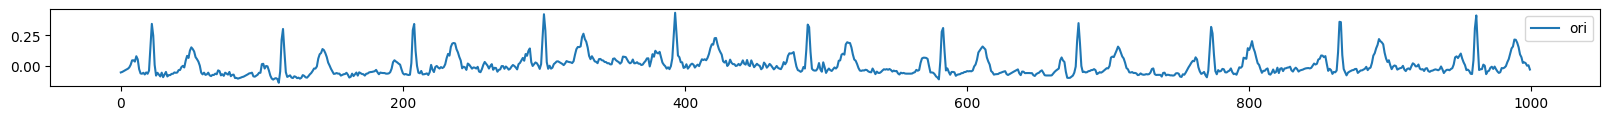

In [20]:

# plot_value = (((X[0,:,1] * 1000) / 4) ).astype(np.int8)
plot_value = (X[0,:,1] * 100 + 100).astype(np.uint)
print(len(plot_value))
plt.figure(figsize = (20,1))
plt.plot(plot_value, label="plt")
plt.legend()
plt.show()
plt.figure(figsize = (20,1))
plt.plot(X[0,:,1], label="ori")
plt.legend()
plt.show()

In [9]:
ser.close()

In [24]:
#1D array send succeed

ser.open()
# values = bytearray([4, 9, 62, 144, 56, 30, 147, 3, 210, 89, 111, 78, 184, 151, 17, 129])
send_values = X[0,:,1]
send_values = (X[0,:,1] * 100 + 100).astype(np.uint)
print(send_values)
print(len(send_values))
values = bytearray(send_values)
ser.write(values)

total = 0
ret = []
# while total < len(send_values):
#     print(total)
#     time.sleep(1)
#     ret.append(ord(ser.read(1)))
#     total+=1


ret= ser.read(len(send_values) * 4)
# ret = list(ret)
filtered = list (filter(lambda s:s != 0 , ret))
print("return val: ",filtered)
# print("return val: ",list(ret))
print("total: ", len(filtered))
ser.close()

[ 94  94  95  96  96  97  98 100 104 104 103 107 105  97  93  93  94  92
  94  93  96 115 134 124 100  91  94  92  91  94  90  92  94  91  92  92
  93  93  94  94  94  96  96  98  99  98 104 108 106 112 115 113 111 107
 105 103 100  94  92  94  92  92  94  92  91  92  92  93  93  96  95  92
  93  91  94  93  92  94  91  92  92  89  90  89  89  90  90  91  91  92
  92  93  93  94  91  91  91  92  94  94 101 101  97  99  99  96  91  89
  88  89  89  89  86  95 121 130 111  94  90  91  92  90  89  91  90  89
  90  89  90  92  91  90  90  91  92  94  95  97  97  99 105 109 110 113
 112 110 107 102 100  97  95  93  93  94  93  93  91  92  93  93  94  92
  90  90  93  91  93  94  91  94  93  93  93  91  93  93  94  94  94  95
  95  96  94  93  94  94  94  94  93  93  93  94  97 102 104 103 102 101
 100  97  93  92  93  92  92  92 102 129 134 112  99  94  93  95  92  93
  93  93  92  94 100  96  94  99  99  98  97  98  98  98 101 106 109 108
 115 118 118 118 113 111 107 104  97  99  98  96 10

1000


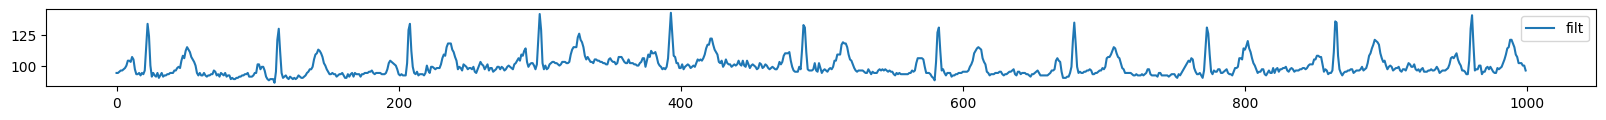

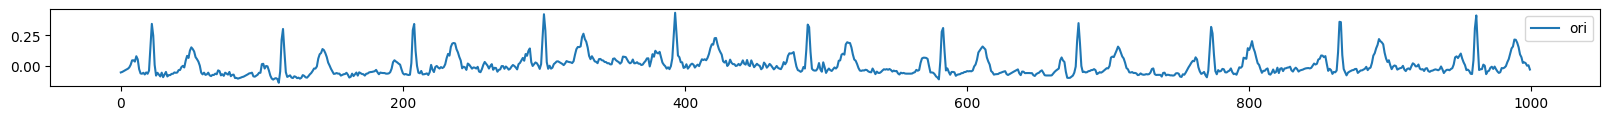

In [27]:
# plot_value = (((X[0,:,1] * 1000) / 4) ).astype(np.int8)
plot_value = (X[0,:,1] * 100 + 100).astype(np.uint)
print(len(plot_value))
plt.figure(figsize = (20,1))
plt.plot(filtered, label="filt")
plt.legend()
plt.show()
plt.figure(figsize = (20,1))
plt.plot(X[0,:,1], label="ori")
plt.legend()
plt.show()

In [48]:
values = bytearray(send_values)
arr = filter(lambda s: s != '\x00', values)
ser.close()

In [59]:
ser.open()
# values = bytearray([4, 9, 62, 144, 56, 30, 147, 3, 210, 89, 111, 78, 184, 151, 17, 129])
send_values = X[0,:,1]
send_values = (X[0,:,1] * 100 + 100).astype(np.uint)
# print(send_values)
# print(len(send_values))
values = bytearray(send_values)
# print(len(values))
for i in range(0,len(send_values), 50):
    ser.write(send_values[i:i+50])
    time.sleep(1)

ser.close()


In [62]:
cmp = [94,94,95,96,96,97,98,100,104,104,103,107,105,97,93,93,94,92,94,93,96,115,134,124,100,91,94,92,91,94,90,92,94,91,92,92,93,93,94,94,94,96,96,98,99,98,104,108,106,112,115,113,111,107,105,103,100,94,92,94,92,92,94,92,91,92,92,93,93,96,95,92,93,91,94,93,92,94,91,92,92,89,90,89,89,90,90,91,91,92,92,93,93,94,91,91,91,92,94,94,101,101,97,99,99,96,91,89,88,89,89,89,86,95,121,130,111,94,90,91,92,90,89,91,90,89,90,89,90,92,91,90,90,91,92,94,95,97,97,99,105,109,110,113,112,110,107,102,100,97,95,93,93,94,93,93,91,92,93,93,94,92,90,90,93,91,93,94,91,94,93,93,93,91,93,93,94,94,94,95,95,96,94,93,94,94,94,94,93,93,93,94,97,102,104,103,102,101,100,97,93,92,93,92,92,92,102,129,134,112,99,94,93,95,92,93,93,93,92,94,100,96,94,99,99,98,97,98,98,98,101,106,109,108,115,118,118,118,113,111,107,104,97,99,98,96,101,100,99,97,98,98,97,99,95,94,97,100,103,101,100,97,99,101,96,98,98,95,96,97,99,99,97,99,98,96,97,99,100,99,98,97,101,102,104,106,104,109,108,112,114,103,99,101,102,102,100,97,101,122,142,129,102,97,100,97,98,101,102,103,103,102,102,101,100,101,103,103,103,102,102,103,109,113,115,115,115,123,126,121,119,115,108,105,107,105,103,103,102,105,105,104,104,103,103,102,102,101,101,105,106,104,103,103,101,102,107,107,107,105,103,102,102,105,102,102,102,101,101,100,100,102,103,106,106,99,104,109,107,112,110,110,111,107,102,100,99,97,98,97,99,106,124,143,125,108,107,102,102,98,98,101,97,99,100,101,100,98,99,100,99,102,105,104,105,104,106,109,114,117,117,122,122,117,113,111,109,103,102,104,99,101,105,102,101,101,99,100,101,100,101,104,101,100,104,100,99,104,101,98,100,101,100,99,97,98,102,101,98,99,101,100,98,97,98,99,98,97,97,99,103,101,103,108,110,110,110,111,104,99,96,95,95,95,99,97,113,133,131,111,97,96,96,96,97,102,96,95,102,98,94,96,97,96,95,97,98,97,99,104,104,109,109,109,117,119,118,118,115,109,105,104,101,98,96,95,96,96,96,96,95,94,94,97,95,93,95,94,94,94,96,97,96,97,96,97,96,95,96,95,95,93,92,94,93,94,93,93,93,93,93,93,94,94,96,95,96,102,106,106,106,106,105,99,94,94,94,93,91,90,88,103,127,131,112,96,97,94,92,94,94,94,91,92,92,93,93,94,94,94,95,95,95,95,96,99,101,104,110,112,114,115,114,113,106,103,101,95,94,92,93,93,93,94,94,94,95,95,93,92,93,93,94,95,95,96,97,93,92,95,95,93,94,94,94,93,93,92,91,93,93,94,95,96,94,92,92,92,92,92,92,93,94,96,96,97,104,106,104,103,95,90,90,90,91,91,94,99,120,135,118,99,94,95,94,94,95,95,96,96,97,96,93,93,94,94,95,96,96,98,97,99,106,107,107,109,112,115,114,110,107,106,102,98,97,94,94,94,94,94,93,92,92,93,92,92,92,93,92,93,94,97,97,93,92,92,92,92,91,94,94,92,92,92,92,92,91,92,93,93,93,91,90,93,92,94,96,98,100,102,104,103,106,105,98,95,93,93,94,92,90,96,114,131,126,109,95,93,96,95,95,97,97,94,94,95,96,97,94,93,93,92,95,98,98,99,106,106,105,114,113,116,120,114,111,106,102,100,97,94,95,95,97,97,93,92,94,96,94,94,98,94,97,98,95,97,97,98,98,99,96,95,97,98,97,95,96,96,96,97,97,98,98,97,98,100,101,101,101,105,105,108,108,107,107,101,95,97,96,93,94,94,96,111,136,135,108,97,94,92,94,95,95,96,96,97,97,94,95,96,96,96,97,99,96,97,98,102,108,110,114,117,121,120,119,117,110,106,103,104,100,97,99,100,99,96,97,98,98,99,96,95,97,97,96,99,102,101,99,99,101,97,96,97,95,97,98,95,95,95,96,96,97,96,96,97,99,97,94,95,96,96,96,97,98,101,106,107,106,108,110,105,102,100,96,96,95,93,93,104,130,141,117,96,97,97,100,100,93,95,95,98,99,97,99,97,95,94,94,98,97,98,99,102,105,109,114,115,121,121,118,115,109,107,102,102,102,100,100,96] 
print(len(cmp))
print((send_values== cmp))


1000
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  Tr

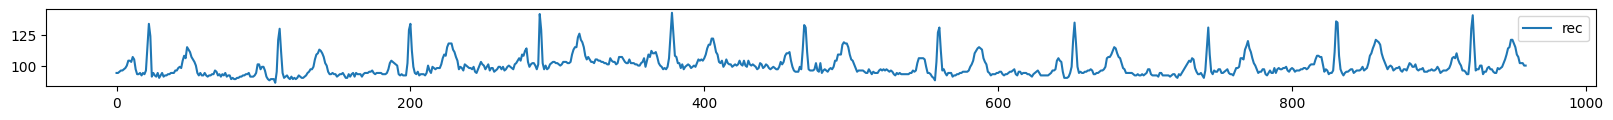

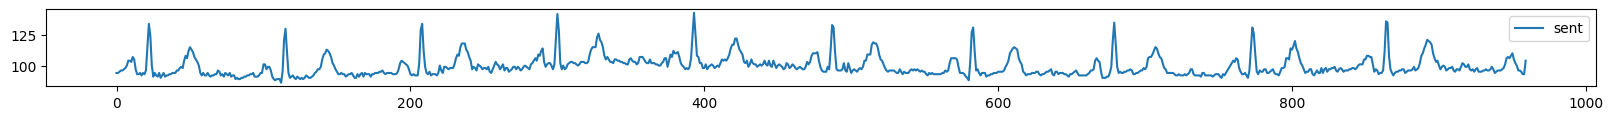

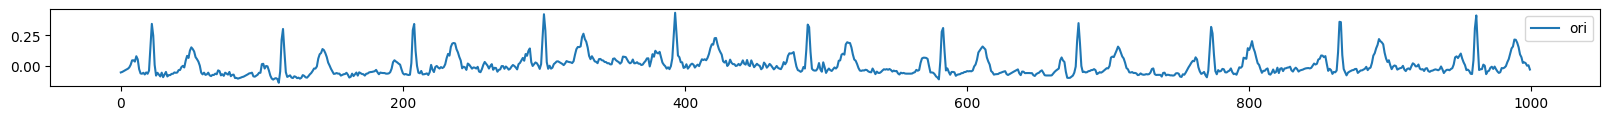

In [55]:
plt.figure(figsize = (20,1))
plt.plot(cmp, label="rec")
plt.legend()
plt.show()

plt.figure(figsize = (20,1))
plt.plot(send_values[0:960], label="sent")
plt.legend()
plt.show()

plt.figure(figsize = (20,1))
plt.plot(X[0,:,1], label="ori")
plt.legend()
plt.show()